In [1]:
import seaborn as sns

In [2]:
df=sns.load_dataset('titanic')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
### Delete the rows or data point to handle missing values
df.shape

(891, 15)

In [6]:
df.dropna().shape

(182, 15)

In [10]:
### Column wise deletion
df.dropna(axis=1)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


## Imputation Missing Values
1. Mean Value Imputation

<Axes: xlabel='age', ylabel='Count'>

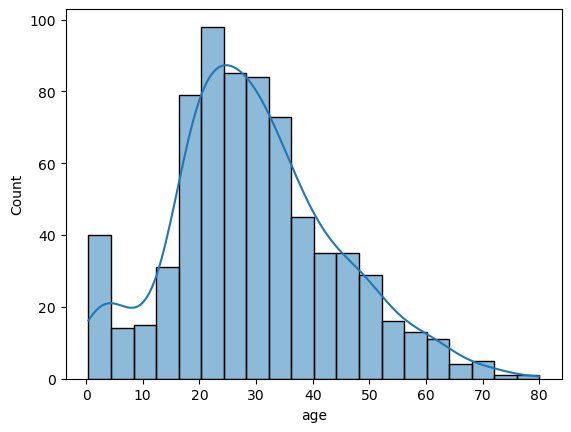

In [13]:
sns.histplot(df['age'],kde=True)

In [14]:
df['age_mean']=df['age'].fillna(df['age'].mean())

In [15]:
df[['age_mean','age']]

,age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


<Axes: xlabel='age_mean', ylabel='Count'>

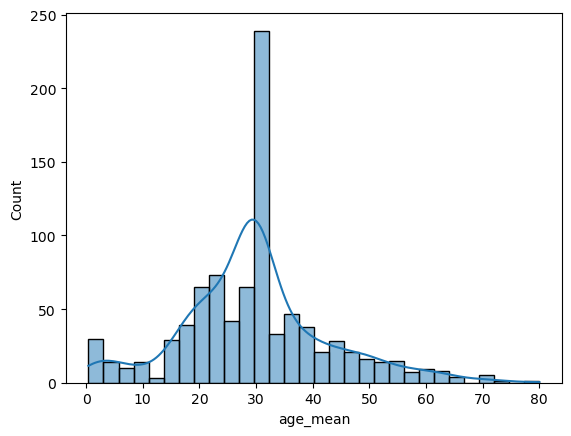

In [17]:
sns.histplot(df['age_mean'],kde=True)

In [ ]:
## Mean Imputation works well when we have normally distributed data

### 2. Median Value Imputation - If we have outliers in the dataset

In [18]:
df['age_median']=df['age'].fillna(df['age'].median())

In [20]:
df[['age_median','age','age_mean']]

,age_median,age,age_mean
0,22.0,22.0,22.000000
1,38.0,38.0,38.000000
2,26.0,26.0,26.000000
3,35.0,35.0,35.000000
4,35.0,35.0,35.000000
...,...,...,...
886,27.0,27.0,27.000000
887,19.0,19.0,19.000000
888,28.0,NaN,29.699118
889,26.0,26.0,26.000000


### 3. Mode Imputation Technique - Categorical values

In [23]:
df['embarked'].isna().sum()

2

In [25]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [30]:
df[df['embarked'].notna()]['embarked'].mode()[0]

'S'

In [31]:
df['embarked_mode']=df['embarked'].fillna(df[df['embarked'].notna()]['embarked'].mode()[0])

In [32]:
df[['embarked_mode','embarked']]

,embarked_mode,embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [33]:
df['embarked_mode'].isna().sum()

0

In [34]:
df['embarked'].isna().sum()

2

# Handling Imbalanced Dataset
1. Upsampling
2. Downsampling

In [43]:
import numpy as np
import pandas as pd

#set the random seed for reproducibility
np.random.seed(123)

# Create a dtaframe with two classes
n_samples=1000
class_0_ratio=0.9
n_class_0=int(n_samples*class_0_ratio)
n_class_1=n_samples-n_class_0

In [44]:
n_class_0,n_class_1

(900, 100)

In [45]:
## Create my dataframe with imbalaced dataset

class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

In [46]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [47]:
df.head()

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [48]:
df.tail()

,feature_1,feature_2,target
995,1.376371,2.845701,1
996,2.239810,0.880077,1
997,1.131760,1.640703,1
998,2.902006,0.390305,1
999,2.697490,2.013570,1


In [49]:
df['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

In [51]:
## Upsampling
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [52]:
from sklearn.utils import resample
df_minority_upsampled=resample(df_minority,replace=True  # Sample with replacement
         ,n_samples=len(df_majority),random_state=42)

In [53]:
df_minority_upsampled.shape

(900, 3)

In [54]:
df_minority_upsampled.head()

,feature_1,feature_2,target
951,1.125854,1.843917,1
992,2.196570,1.397425,1
914,1.932170,2.998053,1
971,2.272825,3.034197,1
960,2.870056,1.550485,1


In [55]:
df_upsampled=pd.concat([df_majority,df_minority_upsampled])

In [57]:
df_upsampled['target'].value_counts()

0    900
1    900
Name: target, dtype: int64

## Downsampling

In [58]:
import pandas as pd

# Set the random seed for reproducibility
np.random.seed(123)

# Create a dataframe with two classes
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

df = pd.concat([class_0, class_1]).reset_index(drop=True)

# Check the class distribution
print(df['target'].value_counts())

0    900
1    100
Name: target, dtype: int64


In [59]:
## downsampling
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [60]:
from sklearn.utils import resample
df_majority_downsampled=resample(df_majority,replace=False  # Sample with replacement
         ,n_samples=len(df_minority),random_state=42)

In [61]:
df_majority_downsampled.shape

(100, 3)

In [62]:
df_downsampled=pd.concat([df_minority,df_majority_downsampled])

In [64]:
df_downsampled['target'].value_counts()

1    100
0    100
Name: target, dtype: int64

# SMOTE(Synthetic Minority Oversampling Technique)
SMOTE (Synthetic Minority Over-sampling Technique) is a technique used in machine learning to address imbalanced datasets where the minority class has significantly fewer instances than the majority class. SMOTE involves generating synthetic instances of the minority class by interpolating between existing instances.

In [65]:
from sklearn.datasets import make_classification

In [67]:
X,y=make_classification(n_samples=1000,n_redundant=0,n_features=2,n_clusters_per_class=1,
                   weights=[0.90],random_state=12 )

In [70]:
import pandas as pd
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
final_df=pd.concat([df1,df2],axis=1)
final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [71]:
final_df['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

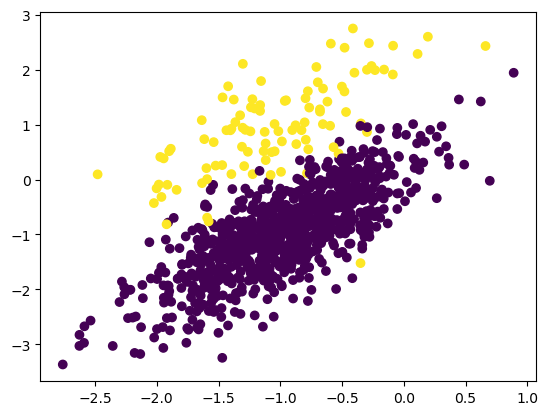

In [72]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])

In [75]:
!pip install imblearn

In [77]:
from imblearn.over_sampling import SMOTE

In [78]:
oversample=SMOTE()
X,y=oversample.fit_resample(final_df[['f1','f2']],final_df['target'])

In [79]:
X.shape

(1800, 2)

In [80]:
y.shape

(1800,)

In [82]:
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
oversampled_df=pd.concat([df1,df2],axis=1)

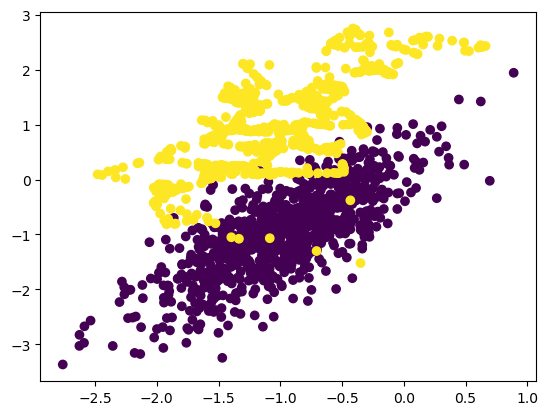

In [83]:
plt.scatter(oversampled_df['f1'],oversampled_df['f2'],c=oversampled_df['target'])

## Feature Scaling

1. Standardization
2. Normalization-Min Max Scaler
3. Unit Vector

In [2]:
import seaborn as sns
df=sns.load_dataset('tips')

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
import numpy as np
mean=np.mean(df['total_bill'])
std=np.std(df['total_bill'])
print(mean,std)

19.78594262295082 8.88415057777113


In [6]:
normalized_data=[]
for i in list(df['total_bill']):
    z_score=(i-mean)/std
    normalized_data.append(z_score)
    

In [7]:
normalized_data

[-0.31471130509049433,
 -1.0632353132988694,
 0.13777989987156147,
 0.4383151031672548,
 0.5407447042905061,
 0.6195367051545456,
 -1.2399545152367868,
 0.7985071071171497,
 -0.5342033074974615,
 -0.5634689078183904,
 -1.0711145133852735,
 1.7417599174609368,
 -0.49143050702841135,
 -0.1526249033130415,
 -0.5578409077566732,
 0.20193910057513614,
 -1.0643609133112129,
 -0.39350330595453376,
 -0.31696250511518115,
 0.09725829942719796,
 -0.21003050394255576,
 0.05673669898283485,
 -0.4520345065963916,
 2.2100095225958007,
 0.0038334984026941687,
 -0.22241210407833373,
 -0.7221785095588128,
 -0.7987193103981655,
 0.2154463007232573,
 -0.01530170180714419,
 -1.1521577142739996,
 -0.16162970341178867,
 -0.5319521074727744,
 0.10176069947657196,
 -0.22578890411536373,
 0.4810879036363047,
 -0.39125210592984694,
 -0.3214649051645547,
 -0.12335930299211235,
 1.2926455125359118,
 -0.4216433062631193,
 -0.26180810451035325,
 -0.6580193088552377,
 -1.1375249141135353,
 1.1947183114620339,
 -0.16

<Axes: xlabel='total_bill', ylabel='Count'>

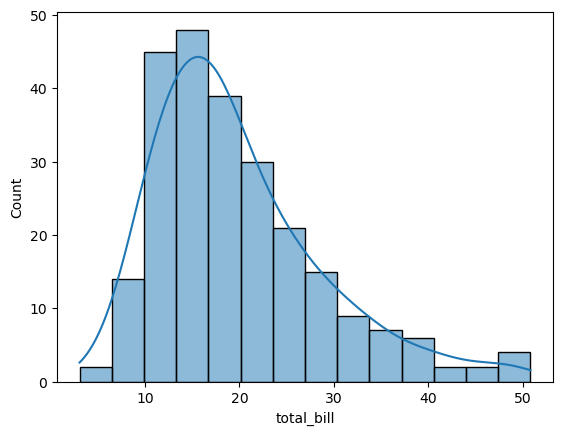

In [11]:
sns.histplot(df['total_bill'],kde=True)

<Axes: ylabel='Count'>

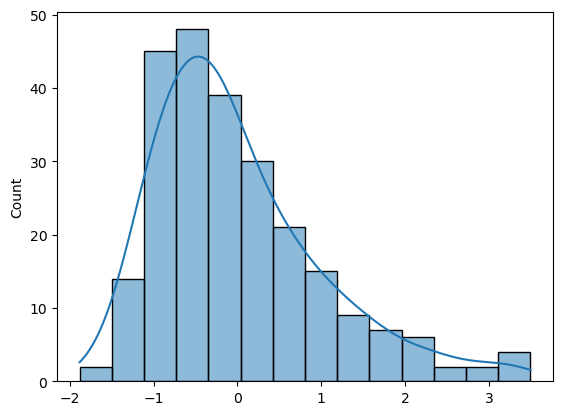

In [12]:
sns.histplot(normalized_data,kde=True)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler

StandardScaler()

In [14]:
scaler.fit(df[['total_bill']])

StandardScaler()

In [15]:
scaler.transform(df[['total_bill']])

array([[-3.14711305e-01],
       [-1.06323531e+00],
       [ 1.37779900e-01],
       [ 4.38315103e-01],
       [ 5.40744704e-01],
       [ 6.19536705e-01],
       [-1.23995452e+00],
       [ 7.98507107e-01],
       [-5.34203307e-01],
       [-5.63468908e-01],
       [-1.07111451e+00],
       [ 1.74175992e+00],
       [-4.91430507e-01],
       [-1.52624903e-01],
       [-5.57840908e-01],
       [ 2.01939101e-01],
       [-1.06436091e+00],
       [-3.93503306e-01],
       [-3.16962505e-01],
       [ 9.72582994e-02],
       [-2.10030504e-01],
       [ 5.67366990e-02],
       [-4.52034507e-01],
       [ 2.21000952e+00],
       [ 3.83349840e-03],
       [-2.22412104e-01],
       [-7.22178510e-01],
       [-7.98719310e-01],
       [ 2.15446301e-01],
       [-1.53017018e-02],
       [-1.15215771e+00],
       [-1.61629703e-01],
       [-5.31952107e-01],
       [ 1.01760699e-01],
       [-2.25788904e-01],
       [ 4.81087904e-01],
       [-3.91252106e-01],
       [-3.21464905e-01],
       [-1.2

In [17]:
import pandas as pd
pd.DataFrame(scaler.fit_transform(df[['total_bill','tip']]),columns=['total_bill','tip'])

,total_bill,tip
0,-0.314711,-1.439947
1,-1.063235,-0.969205
2,0.137780,0.363356
3,0.438315,0.225754
4,0.540745,0.443020
...,...,...
239,1.040511,2.115963
240,0.832275,-0.722971
241,0.324630,-0.722971
242,-0.221287,-0.904026


## Normalization Min-Max Scaler

In [18]:
df=sns.load_dataset('taxis')
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler1=MinMaxScaler()
scaler1

MinMaxScaler()

In [22]:
pd.DataFrame(scaler1.fit_transform(df[['distance','fare','tip']]),columns=['distance','fare','tips'])

,distance,fare,tips
0,0.043597,0.040268,0.064759
1,0.021526,0.026846,0.000000
2,0.037330,0.043624,0.071084
3,0.209809,0.174497,0.185241
4,0.058856,0.053691,0.033133
...,...,...,...
6428,0.020436,0.023490,0.031928
6429,0.510627,0.382550,0.000000
6430,0.112807,0.100671,0.000000
6431,0.030518,0.033557,0.000000


## Unit vector

In [23]:
from sklearn.preprocessing import normalize

In [25]:
pd.DataFrame(normalize(df[['distance','fare','tip']]),columns=['distance','fare','tips'])

,distance,fare,tips
0,0.213461,0.933894,0.286839
1,0.156064,0.987747,0.000000
2,0.171657,0.939731,0.295702
3,0.267899,0.939386,0.213971
4,0.231742,0.965592,0.118017
...,...,...,...
6428,0.160133,0.960800,0.226322
6429,0.307453,0.951563,0.000000
6430,0.250500,0.968117,0.000000
6431,0.183497,0.983020,0.000000
